## Check, install and load Package And Prerequisites

In [2]:

if (!requireNamespace("googledrive", quietly = TRUE)) {
  install.packages("googledrive")
}
if (!requireNamespace("rlang", quietly = TRUE)) {
  install.packages("rlang")
}                            # resolving version error
if (!requireNamespace("raster", quietly = TRUE)) {
  install.packages("raster")
}    
if (!requireNamespace("sp", quietly = TRUE)) {
  install.packages("sp")
}    
if (!requireNamespace("terra", quietly = TRUE)) {
  install.packages("terra")
}    
library(googledrive)
library(terra)
library(rlang)
library(raster)
library(sp)

## Set Workspace, create directory, google drive public file id call

In [18]:
# Set Workspace as the current working directory
Workspace <- getwd() 
#Workspace <- "/DIR"      #change directory

#The cat function in useful for displaying messages and debugging information.
cat("Workspace:", Workspace, "\n")

# Create the 'raw_data' directory within the current and parent working directory
dir.create(file.path(Workspace, "raw_data"), recursive = TRUE)

# Install and load the googledrive package
#install.packages("googledrive")
#library(googledrive)

# De-authenticate to access public files
drive_deauth()

# Google Drive file IDs
csv_file_id <- "1mNBJAwhCiJzliAqAPWqBJf6qQ6KP11jH"
gri_file_id <- "1IDrfCzAyf3C3QYs6EhTCU8gsaIsmVbWV"
tif_file_id <- "1ChbZpogg4HgSRlalYEnhKObz0p7hSmaD"

# Download the CSV and spatial files  to the 'raw_data' directory
drive_download(as_id(csv_file_id), path = file.path(Workspace, "raw_data", "tree_kangaroo.csv"), overwrite = TRUE)
drive_download(as_id(gri_file_id), path = file.path(Workspace, "raw_data", "env_current.gri"), overwrite = TRUE)
drive_download(as_id(tif_file_id), path = file.path(Workspace, "raw_data", "windspath.tif"), overwrite = TRUE)

# Confirm the files have been downloaded
list.files(file.path(Workspace, "raw_data"))

Workspace: /Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management 


Warning message in dir.create(file.path(Workspace, "raw_data"), recursive = TRUE):
"'/Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data' already exists"


File downloaded:

* Tree_kangaroo.csv <id:<U+00A0>1mNBJAwhCiJzliAqAPWqBJf6qQ6KP11jH>

Saved locally as:

* /Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/tree_kangaroo.csv

File downloaded:

* env_current.grd <id:<U+00A0>1IDrfCzAyf3C3QYs6EhTCU8gsaIsmVbWV>

Saved locally as:

* /Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/env_current.gri

File downloaded:

* pacific-winds_2021_1km.tif <id:<U+00A0>1ChbZpogg4HgSRlalYEnhKObz0p7hSmaD>

Saved locally as:

* /Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/windspath.tif



[1] "current.grd"       "env_current.grd"   "env_current.gri"  
[4] "tree_kangaroo.csv" "windspath.tif"

## Print CSV

In [8]:
# View CSV file
#data <- read.csv("/home/jovyan/raw_data/tree_kangaroo.csvv")
tree_kangaroo_data <- read.csv(file.path(Workspace, "raw_data", "tree_kangaroo.csv"))
print(head(tree_kangaroo_data))




                species    lat    lon present
1 Dendrolagus lumholtzi -17.27 145.48       1
2 Dendrolagus lumholtzi -16.92 145.77       1
3 Dendrolagus lumholtzi -17.29 145.57       0
4 Dendrolagus lumholtzi -17.38 145.67       1
5 Dendrolagus lumholtzi -17.38 145.67       1
6 Dendrolagus lumholtzi -17.35 145.59       0


## Plot Spatial files


Warning message:
"Failed to read scanline 0. (GDAL error 3)"


Warning message:
"/Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/env_current.grd, band 1: IReadBlock failed at X offset 0, Y offset 0: Failed to read scanline 0. (GDAL error 1)"
Warning message:
"Failed to read scanline 0. (GDAL error 3)"
Warning message:
"/Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/env_current.grd, band 2: IReadBlock failed at X offset 0, Y offset 0: Failed to read scanline 0. (GDAL error 1)"


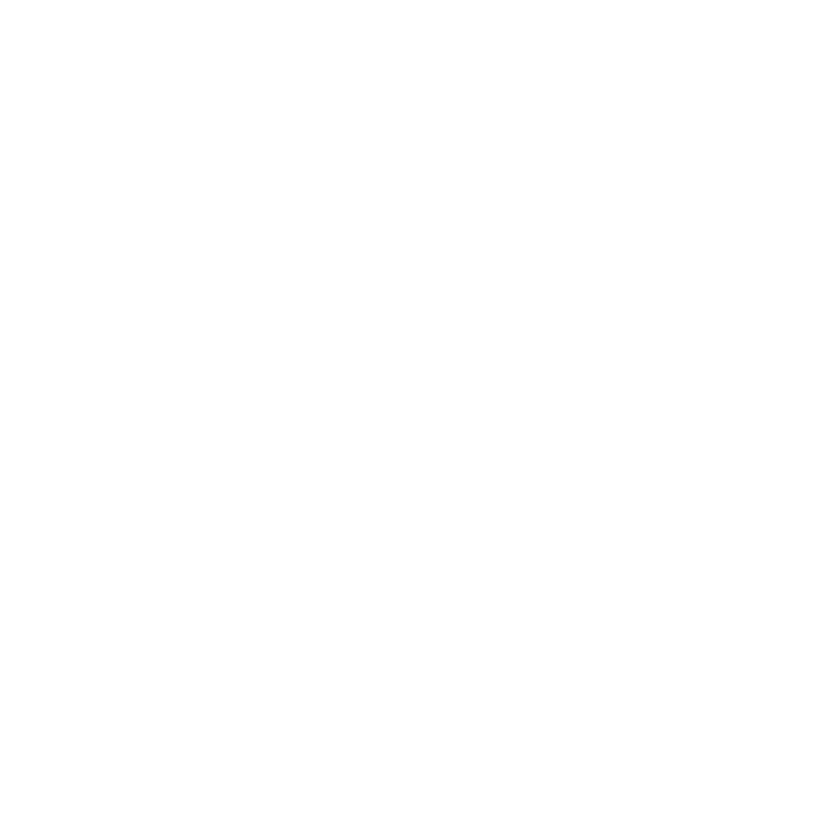

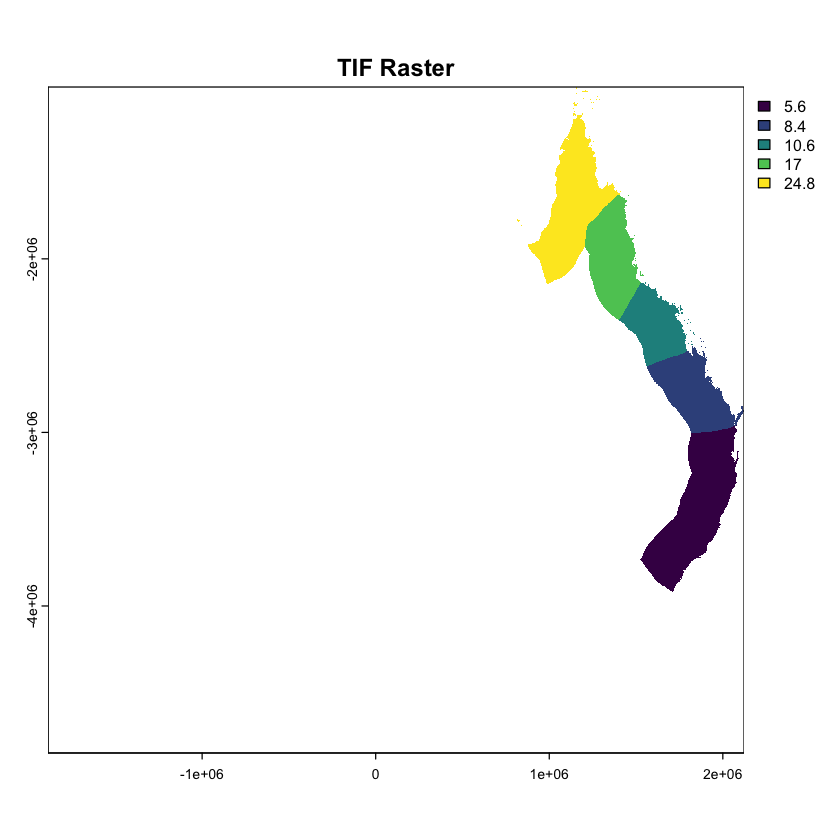

In [29]:
# Plot GRD file
grd_raster <- rast("/Users/qcifecocommons/Library/CloudStorage/OneDrive-QueenslandCyberInfrastructureFoundationLtd/1.GithubRepo/EC_notebook/notebooks/notebooks/Test/Data_Management/raw_data/env_current.grd")
plot(grd_raster, main = "GRD Raster")

# Plot TIF file
tif_raster <- rast(file.path(Workspace, "raw_data", "windspath.tif"))
plot(tif_raster, main = "TIF Raster")

